## Grover's Algorithm Homework

### Quantum Computing FRI Stream Fall 2019

In [1]:
#Import the necessary tools for the computation
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute,Aer
barriers = True

In [2]:
# Include your (or the provided) recursive Toffoli gate here

In [3]:
#control registers Cr must be an array or list
#target register is Tr
def barrier(qc):
    if barrier:
        qc.barrier()
def recCZa(qc,a,Cr,Tr):
    if len(Cr)<=1:
        if len(Cr)==1:          #if only 1 control bit, apply the C-gate
            qc.cu1(np.pi*a,Cr[0],Tr)
        else:                   #if no control bits, just apply the gate
            qc.u1(np.pi*a,Tr)
    else:
        nn=len(Cr)
        #apply C-sqrt(U)
        recCZa(qc,a/2,[Cr[nn-1]],Tr)
       
        #recursively apply CCNot
        qc.h(Cr[nn-1])
        recCZa(qc,1,Cr[0:nn-1],Cr[nn-1])
        qc.h(Cr[nn-1])
        
        #apply C-sqrt(U dg)
        recCZa(qc,-a/2,[Cr[nn-1]],Tr)
        
        #recursively apply CCNot
        qc.h(Cr[nn-1])
        recCZa(qc,1,Cr[0:nn-1],Cr[nn-1])
        qc.h(Cr[nn-1])
        
        #recursivle apply CC-sqrt(U)
        recCZa(qc,a/2,Cr[0:nn-1],Tr)
def recTof(qc,Cr,Tr):
    qc.h(Tr)
    recCZa(qc,1,Cr,Tr)
    qc.h(Tr)

### 1. Use your recursive controlled Z gate to construct your oracle

In [4]:
# Assign the key values of your function
# n is the number of input qubits
# a is the solution to the equation f(a)=1, the number you are trying to find.
# a should be an n bit number

In [5]:
#qubits
n = 4
N = 2**n

#create random array for a
a = []
for i in range(n):
    rand = np.random.randint(0,2)
    a.append(rand)
print(a)


[0, 1, 1, 1]


In [6]:
# Build your unitary U_f as a Python function
# As a reminder, it should give output=1 for input=a and output=0 for all other inputs

In [7]:
def U_f(n, a):
    for i in range(0,n):
        if a[i] == 0:
            qc.x(q[i+1])
    controls = []
    for i in range(1,n+1):
        controls.append(q[i])
    barrier(qc)
    recTof(qc, controls, q[0])
    barrier(qc)    
    for i in range(0,n):
        if a[i] == 0:
            qc.x(q[i+1])

### 2. Make the necessary preparations to implement Grover's search

In [8]:
# Build your W gate
# this rotates your state toward the solution

In [9]:
def W(qc, n):
    for i in range(1,n+1):
        qc.h(q[i])
        qc.x(q[i])
    barrier(qc)
    controls = []
    for i in range(1,n+1):
        controls.append(q[i])
    recCZa(qc,1,controls, q[0])
    barrier(qc)
    for i in range(1,n+1):
        qc.x(q[i])
        qc.h(q[i])
    barrier(qc)
    

In [10]:
# calculate the number R which is the number of times to apply the algorithm

In [11]:
R = int((np.sqrt(N)*np.pi)/4)

### 3. Initialize your circuit and apply the algorithm

In [12]:
#Initialize your registers
#Quantum registers: we want 1 output and n inputs
#Classical registers: we want at least n to hold the outcome of the final measurement
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
qc=QuantumCircuit(q,c)

In [13]:
# initialize the output register to |1>
# then Hadamard the output to put it in |->=(|0>-|1>)/sqrt(2)

In [14]:
qc.x(q[0])
qc.h(q[0])

In [15]:
# Apply a Hadamard gate to the input registers

In [16]:
for i in range(1,n+1):
    qc.h(q[i])
barrier(qc)

In [17]:
# In a loop which executes R times:
#  apply your unitary U_f
#  and then your W

In [18]:
for i in range(R):
    U_f(n,a)
    W(qc,n)


In [19]:
# Apply a Hadamard and then a NOT gate to the output register

In [20]:
barrier(qc)
qc.h(q[0])
qc.x(q[0])


In [21]:
#apply measurement gates to input registers

In [22]:
for i in range(1,n+1):
    qc.measure(q[i], c[i-1])

### 4. Run the simulation, and interpret the outputs

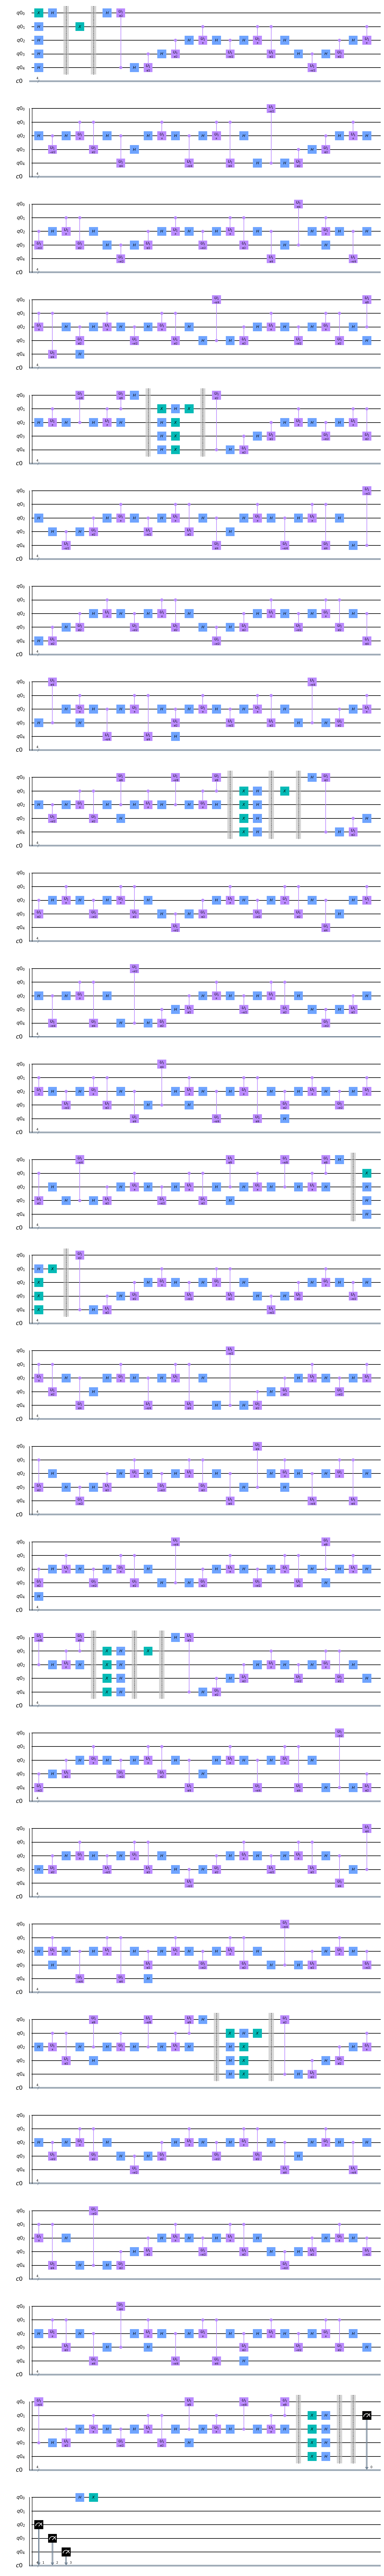

In [23]:
#For fun, draw the circuit!
qc.draw()

In [24]:
#Run the simulation - ecexute this cell
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

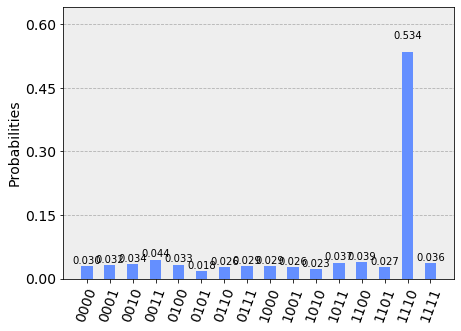

In [27]:
#Print the outcome of the measurement
counts=result.get_counts(qc)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
#print(counts)

In [26]:
# interpret the outcome of the simulation
# you may want to plot the results
# Verify that you found the appropriate value of a
# Comment on the success probability
'''The most outcome with the most counts is the value of a. The success probability is high.'''

'The most outcome with the most counts is the value of a. The success probability is high.'